# importing libraries

In [1]:
import numpy as np
from numpy import median
from scipy import stats
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')
import os

In [2]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [3]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


# EDA

In [4]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
df.shape

(7752, 25)

In [6]:
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

In [7]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

# skewness

In [9]:
df.skew()

station             0.000000
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

there is skewness present in many continious columns

In [10]:
#setting option to see all the columns
pd.set_option('display.max_columns',None)

In [11]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


Count is different in different row indicating missing values. Mean is not equal to median, data does not follow normal distribution. There is high variance in solar radiation column while some columns such as lon and lat have variance close to zero. Difference between minimum, maximum and interquartile range is m=not equal which indicates presence of outliers

# Univariate Analysis

In [12]:
#Separating categorical and continuous variables
cont=[i for i in df.columns if df[i].nunique()>30 and i!="Date"]
cat=[i for i in df.columns if df[i].nunique()<30]

# with the help of countplot

29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.9      1
38.3      1
37.6      1
37.4      1
21.5      1
Name: Next_Tmax, Length: 183, dtype: int64

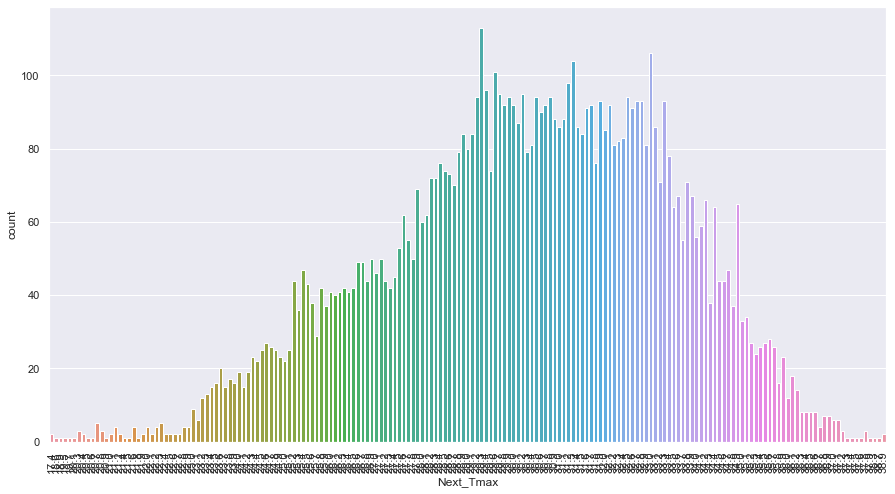

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(x='Next_Tmax',data=df)
plt.xticks(rotation=90)
df['Next_Tmax'].value_counts()

<bound method IndexOpsMixin.value_counts of 0       21.2
1       22.5
2       23.9
3       24.3
4       22.5
        ... 
7747    18.1
7748    18.8
7749    17.4
7750    11.3
7751    29.8
Name: Next_Tmin, Length: 7752, dtype: float64>

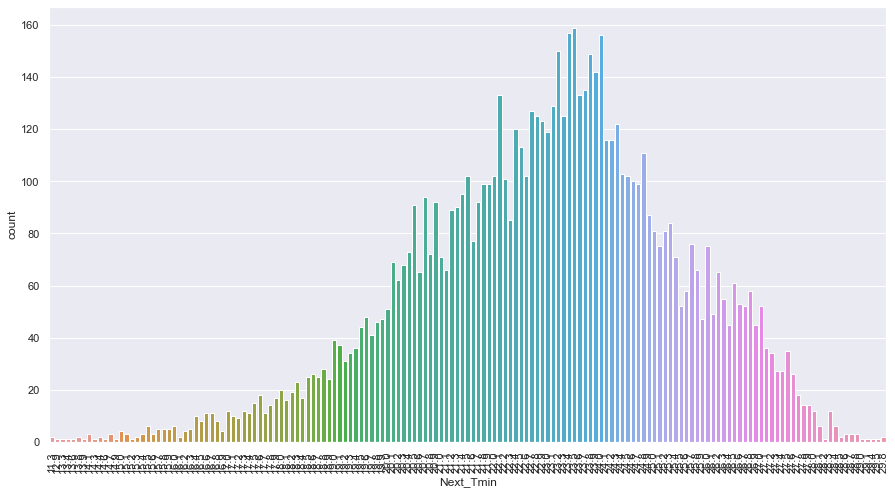

In [14]:
plt.figure(figsize=(15,8))
sns.countplot(x='Next_Tmin',data=df)
plt.xticks(rotation=90)
df['Next_Tmin'].value_counts

All the elevations have same count equal to 310 except two who have 311 counts each.

127.135    311
126.826    311
126.991    310
126.937    310
126.909    310
126.891    310
127.086    310
127.040    310
127.004    310
126.938    310
127.024    310
127.099    310
126.995    310
127.083    310
126.927    310
127.032    310
126.988    310
127.085    310
126.955    310
126.910    310
126.838    310
127.042    310
127.022    310
127.058    310
126.970    310
Name: lon, dtype: int64

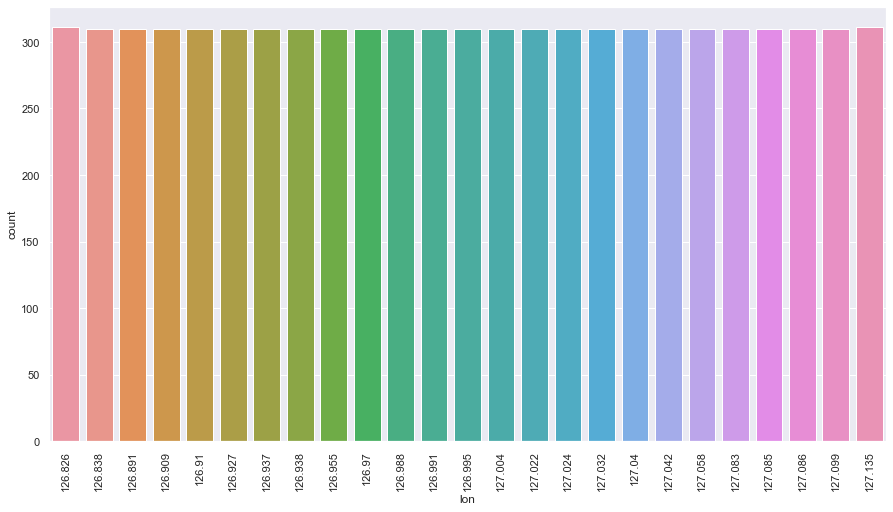

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(x="lon" , data=df)
plt.xticks(rotation=90)
df['lon'].value_counts()

All the longitude have smae count equal to 310 except two longitudes that have 311 counts each.

23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
13.4      1
13.3      1
28.2      1
29.5      1
12.9      1
Name: Next_Tmin, Length: 157, dtype: int64

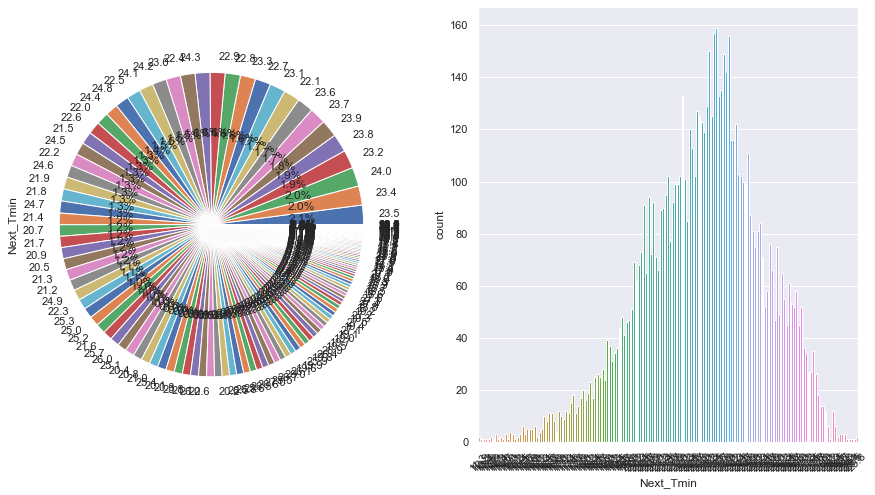

In [16]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Next_Tmin'].value_counts().plot.pie(autopct='%1.1f%%')
fig=plt.gcf()
plt.subplot(1,2,2)
sns.countplot(x='Next_Tmin',data=df)
plt.xticks(rotation=45)
df['Next_Tmin'].value_counts()


29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.9      1
38.3      1
37.6      1
37.4      1
21.5      1
Name: Next_Tmax, Length: 183, dtype: int64

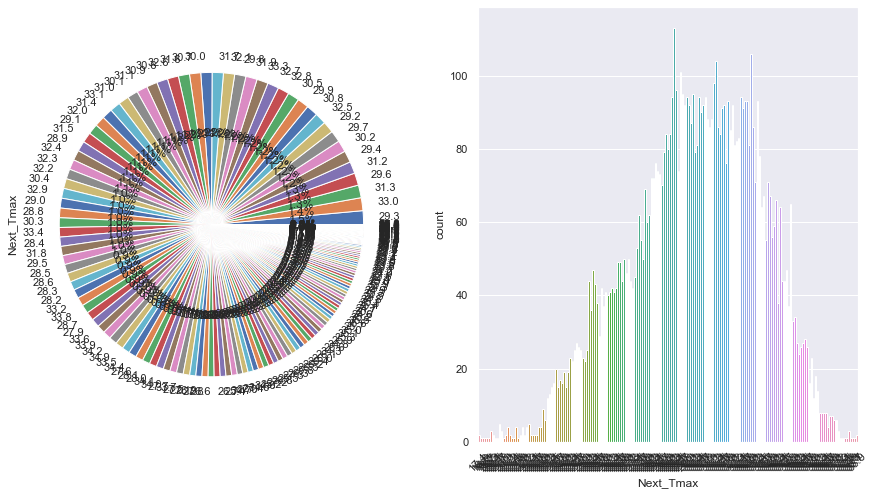

In [17]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Next_Tmax'].value_counts().plot.pie(autopct="%1.1f%%")
fig=plt.gcf()
plt.subplot(1,2,2)
sns.countplot(x='Next_Tmax',data=df)
plt.xticks(rotation=45)
df['Next_Tmax'].value_counts()


1.0     310
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
13.0    310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64

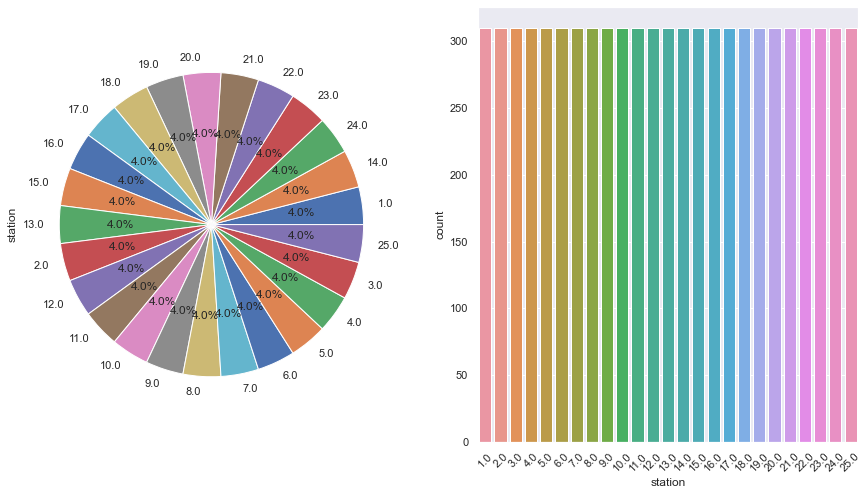

In [18]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['station'].value_counts().plot.pie(autopct="%1.1f%%")
fig=plt.gcf()
plt.subplot(1,2,2)
sns.countplot(x='station',data=df)
plt.xticks(rotation=45)
df['station'].value_counts()


Minimum Tmax is 20.0 and Maximum Tmin is 37.6
Minimum Tmin is 11.3 and Maximum Tmin is 29.9


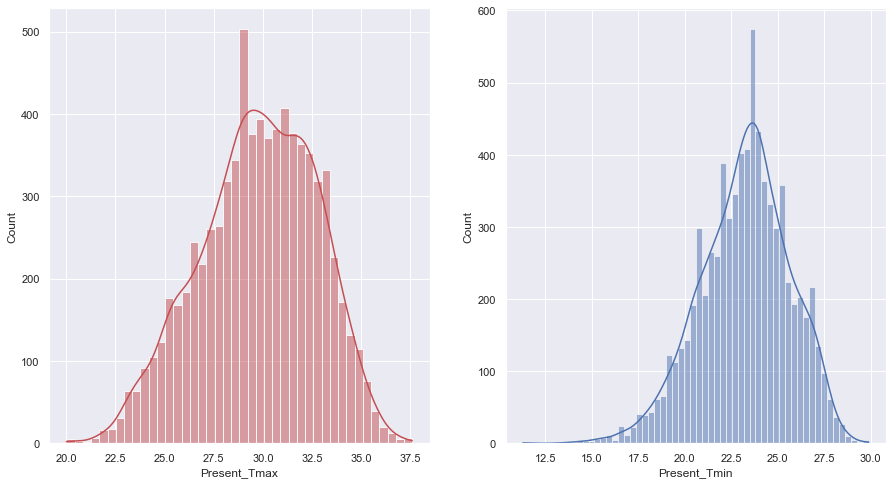

In [19]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color="r")
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color="b")
print("Minimum Tmax is {} and Maximum Tmin is {}".format(df['Present_Tmax'].min(),df["Present_Tmax"].max()))
print('Minimum Tmin is {} and Maximum Tmin is {}'.format(df['Present_Tmin'].min(),df['Present_Tmin'].max()))

Present Tmax and Tmin are almost normally distibuted, Tmax have highest temp as 37.6 and min as 20, most of the days have tmax equal to 28.5, while Tmin have highest temp as 29.9 and min as 11.3, most of the days have tmin equal to 23.

Minimum RHmax is 58.93628311 and Maximum RHmax is 100.0001526
Minimum RHmin is 19.79466629 and Maximum RHmin is 98.5247345


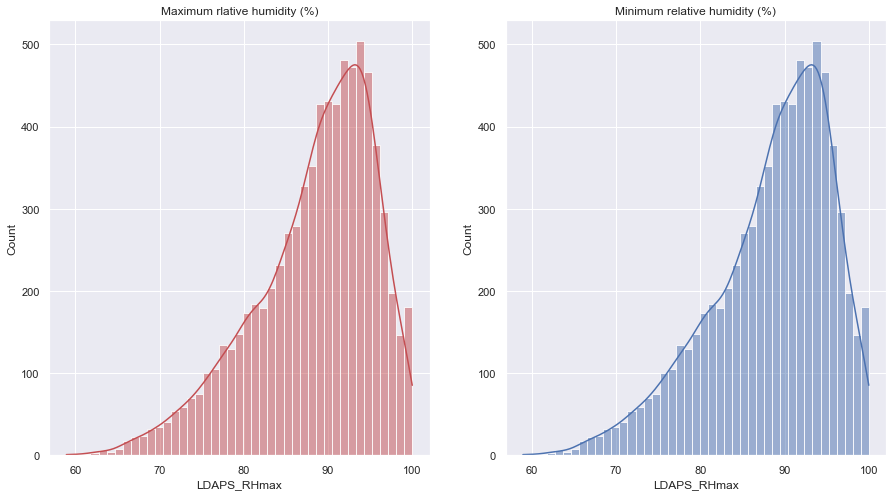

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_RHmax'],kde=True,color="r")
plt.title('Maximum rlative humidity (%)')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_RHmax'],kde=True, color='b')
plt.title('Minimum relative humidity (%)')
print('Minimum RHmax is {} and Maximum RHmax is {}'.format(df['LDAPS_RHmax'].min(),df['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} and Maximum RHmin is {}'.format(df['LDAPS_RHmin'].min(),df['LDAPS_RHmin'].max()))

Data of Maximum relative humidity is left skewed and Data of Maximum relative humidity is slightly right skewed. RHmax for most of the days lie in the range 92 to 97 while RHmin lies in the range 45 to 62.

LDAPS Tmax lapse is 17.62495378 and LDAPS Tmax lapse is 38.54225522
LDAPS Tmax lapse is 17.62495378 and LDAPS Tmax lapseis 38.54225522


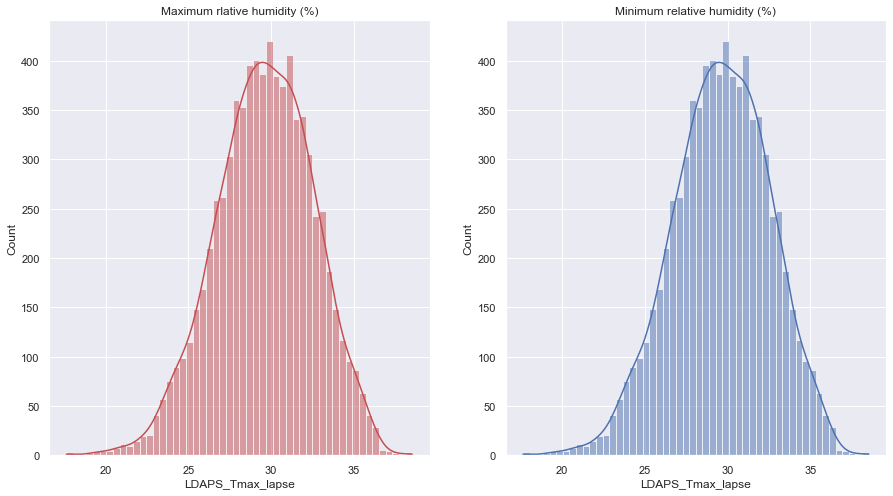

In [21]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True,color="r")
plt.title('Maximum rlative humidity (%)')
plt.subplot(1,2,2)
sns.histplot(df['LDAPS_Tmax_lapse'],kde=True, color='b')
plt.title('Minimum relative humidity (%)')
print('LDAPS Tmax lapse is {} and LDAPS Tmax lapse is {}'.format(df['LDAPS_Tmax_lapse'].min(),df['LDAPS_Tmax_lapse'].max()))
print('LDAPS Tmax lapse is {} and LDAPS Tmax lapseis {}'.format(df['LDAPS_Tmax_lapse'].min(),df['LDAPS_Tmax_lapse'].max()))

Tmax and Tmin for applied lapse rate are almost normally distributed, with Tmax_lapse having maximum at 38.54 , minimum at 17.62 and for majority of days its values lies in the range 27 to 32 while Tmin_lapse having maximum at 29.61 , minimum at 14.27 and for majority of days its values lies in the range 23 to 26

Minimum 2.882579625
Maximum 21.85762099


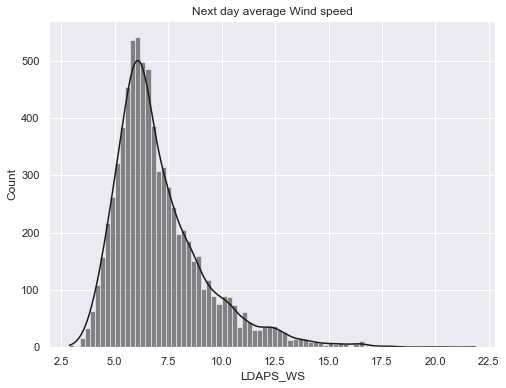

In [22]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_WS'],kde=True, color='k')
plt.title('Next day average Wind speed')
print ('Minimum',df['LDAPS_WS'].min())
print ('Maximum',df['LDAPS_WS'].max())

Data of average wind speed ris right skewed. It have its minimum value at 2.88m/s and maximum values at 21.85m/s and majority of its values lies in the rabge 5m/s to 8m/s



Minimum -13.60321209
Maximum 213.4140062


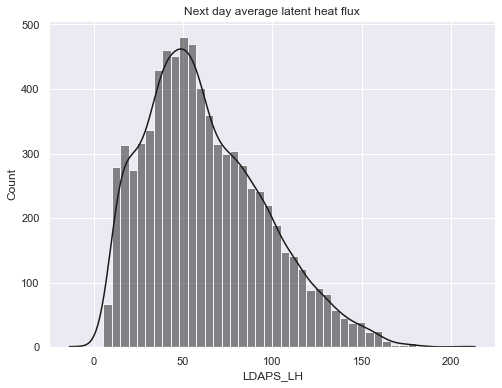

In [23]:
plt.figure(figsize=(8,6))
sns.histplot(df['LDAPS_LH'],kde=True, color='k')
plt.title('Next day average latent heat flux')
print ('Minimum',df['LDAPS_LH'].min())
print ('Maximum',df['LDAPS_LH'].max())

Latent heat flux seems to be normally distributed with slight skewness to the right. It has its minimum value at -13.60 and maximum values at 213.41 and majority of its values lies in the range 30 to 70.

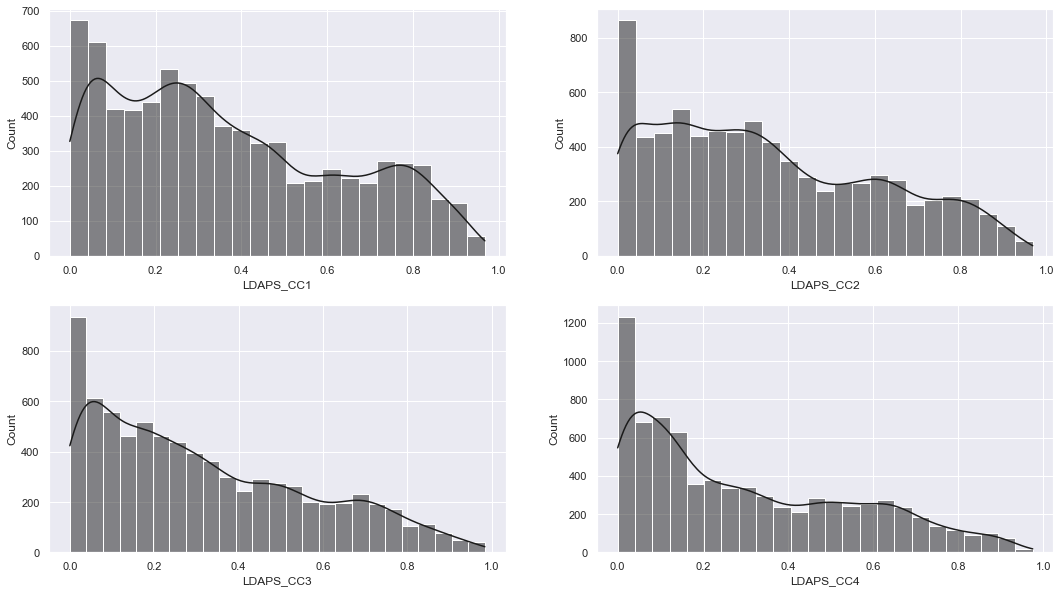

In [24]:
cloud_cover=['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']
fig,ax=plt.subplots(2,2,figsize=(18,10))
r=0
c=0
for i, n in enumerate(cloud_cover):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.histplot(df[n],kde=True,color='k', ax=ax[r,c])
    c+=1

Cloud cover data for all the 6 hour split is right skewed and majority of all the splits values lie close to 0.



Minimum 4329.520508
maximum 5992.895996


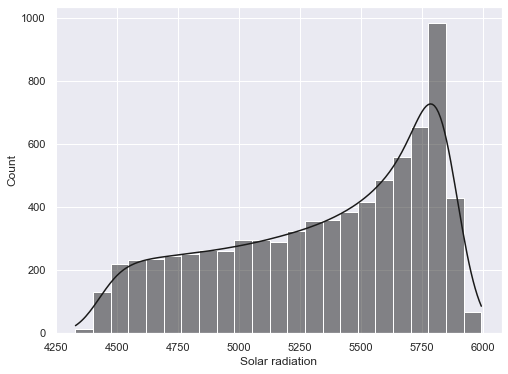

In [25]:
plt.figure(figsize=(8,6))
sns.histplot(df['Solar radiation'],kde=True, color='k')
print('Minimum',df['Solar radiation'].min())
print('maximum',df['Solar radiation'].max())

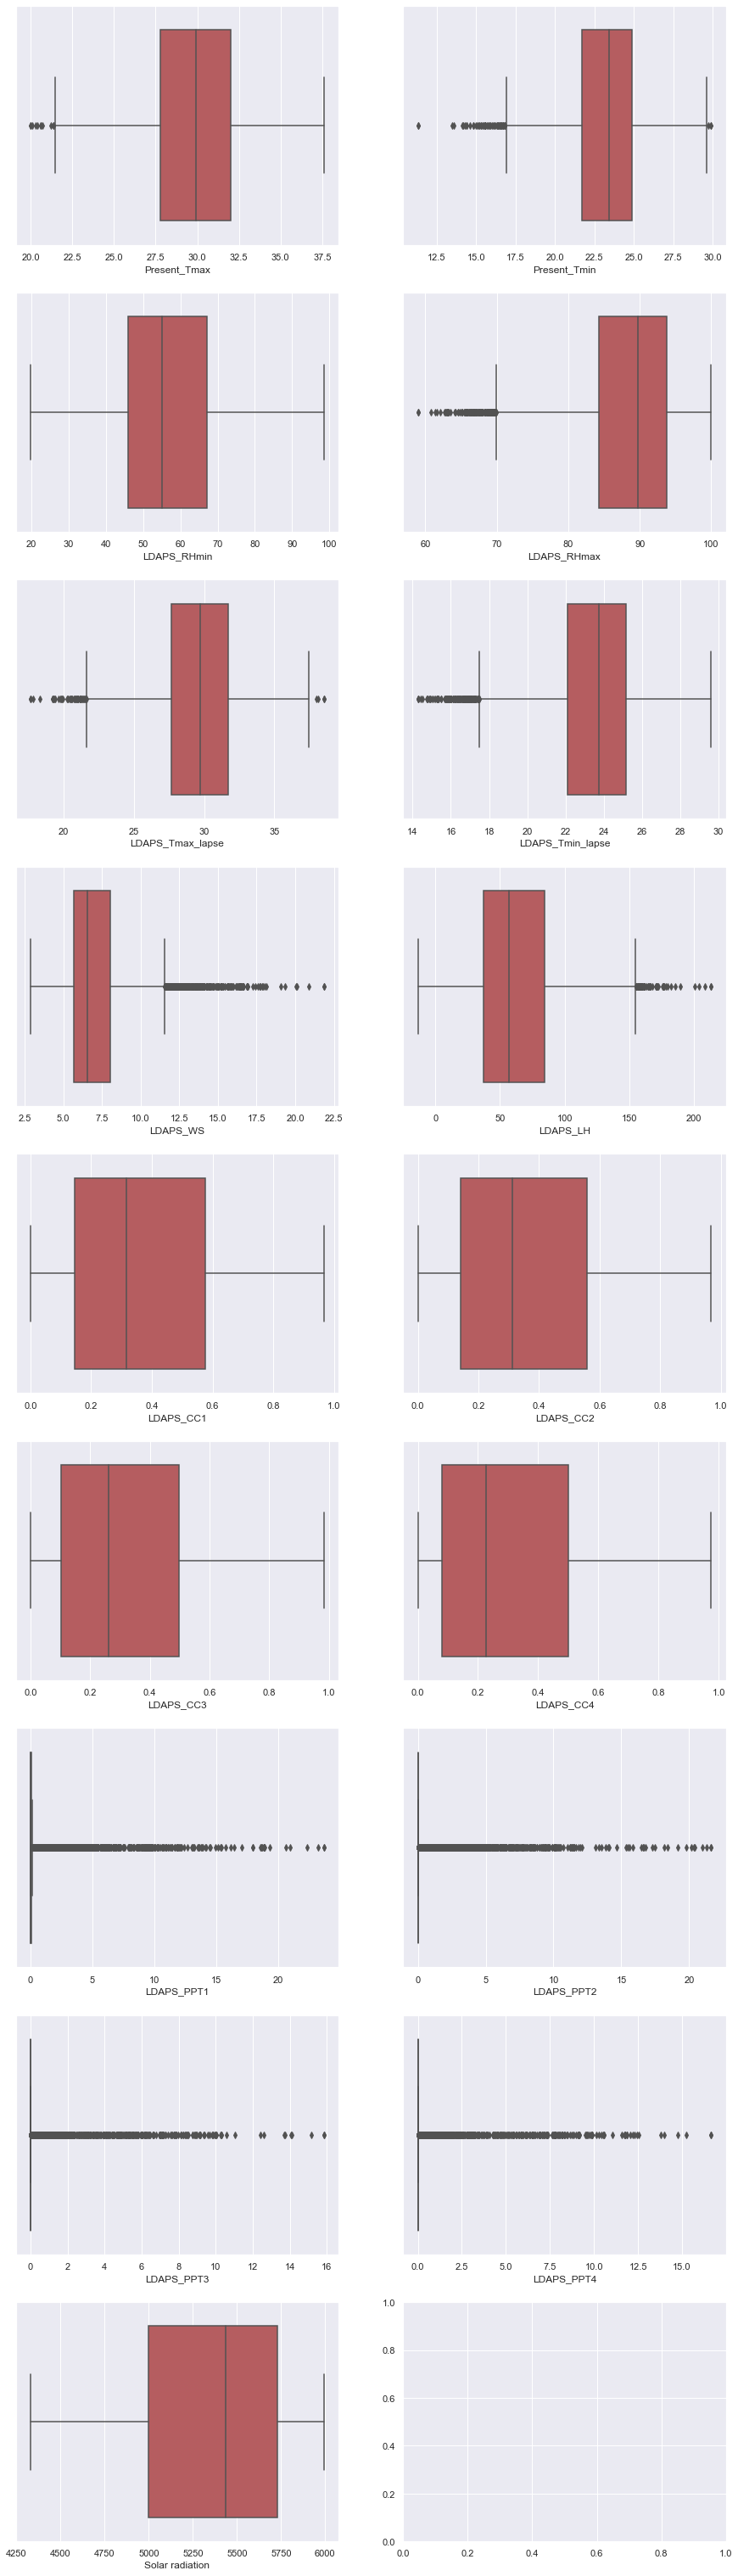

In [26]:
fig,ax=plt.subplots(9,2,figsize=(15,55))
r=0
c=0
for i, n in enumerate(cont[:-2]):
    if i%2==0 and i>0:
        r+=1
        c=0
    sns.boxplot(df[n],color='r',ax=ax[r,c])
    c+=1

There a large no. of outliers especially in the precipitation data. Latent heat flux, wind speed, temperature applied lapse rate and Rhmax also have presence of outliers. While there are few in present day tmax and tmin also.



# BIVARIATE ANALYSIS

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

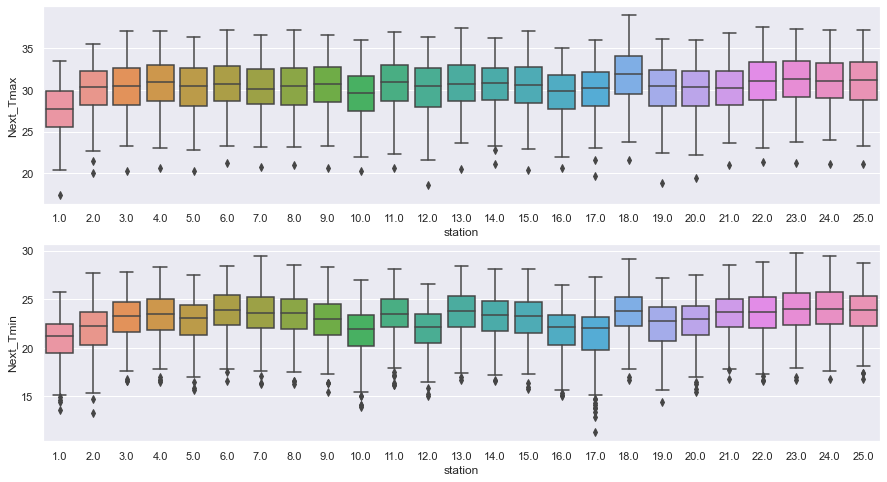

In [27]:
plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
sns.boxplot(x='station',y='Next_Tmax',data=df)
plt.subplot(2,1,2)
sns.boxplot(x='station',y='Next_Tmin' , data=df)


Station 18 observes highest temperature for both Tmax and Tmin while station 1 observes lowest temperatures for both. It coud be because of their location

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '37.4562'),
  Text(1, 0, '37.4697'),
  Text(2, 0, '37.4832'),
  Text(3, 0, '37.4967'),
  Text(4, 0, '37.5102'),
  Text(5, 0, '37.5237'),
  Text(6, 0, '37.5372'),
  Text(7, 0, '37.5507'),
  Text(8, 0, '37.5776'),
  Text(9, 0, '37.6046'),
  Text(10, 0, '37.6181'),
  Text(11, 0, '37.645')])

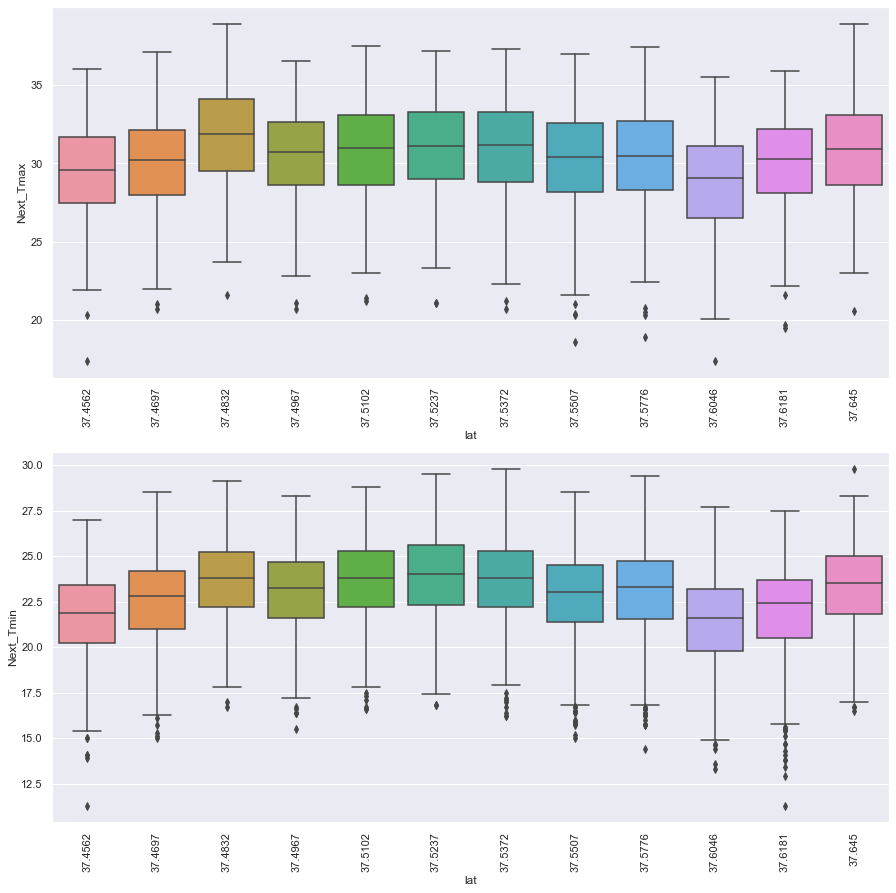

In [28]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.boxplot(x='lat',y='Next_Tmax',data=df)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.boxplot(x='lat',y='Next_Tmin',data=df)
plt.xticks(rotation=90)


Temperature seems to fall as the the latitude increases which is also a know fact. Highest temperature is observed at 37.645 for Tmax while this is not the case for tmin which could be because of the other factors that affect the temperature.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '126.826'),
  Text(1, 0, '126.838'),
  Text(2, 0, '126.891'),
  Text(3, 0, '126.909'),
  Text(4, 0, '126.91'),
  Text(5, 0, '126.927'),
  Text(6, 0, '126.937'),
  Text(7, 0, '126.938'),
  Text(8, 0, '126.955'),
  Text(9, 0, '126.97'),
  Text(10, 0, '126.988'),
  Text(11, 0, '126.991'),
  Text(12, 0, '126.995'),
  Text(13, 0, '127.004'),
  Text(14, 0, '127.022'),
  Text(15, 0, '127.024'),
  Text(16, 0, '127.032'),
  Text(17, 0, '127.04'),
  Text(18, 0, '127.042'),
  Text(19, 0, '127.058'),
  Text(20, 0, '127.083'),
  Text(21, 0, '127.085'),
  Text(22, 0, '127.086'),
  Text(23, 0, '127.099'),
  Text(24, 0, '127.135')])

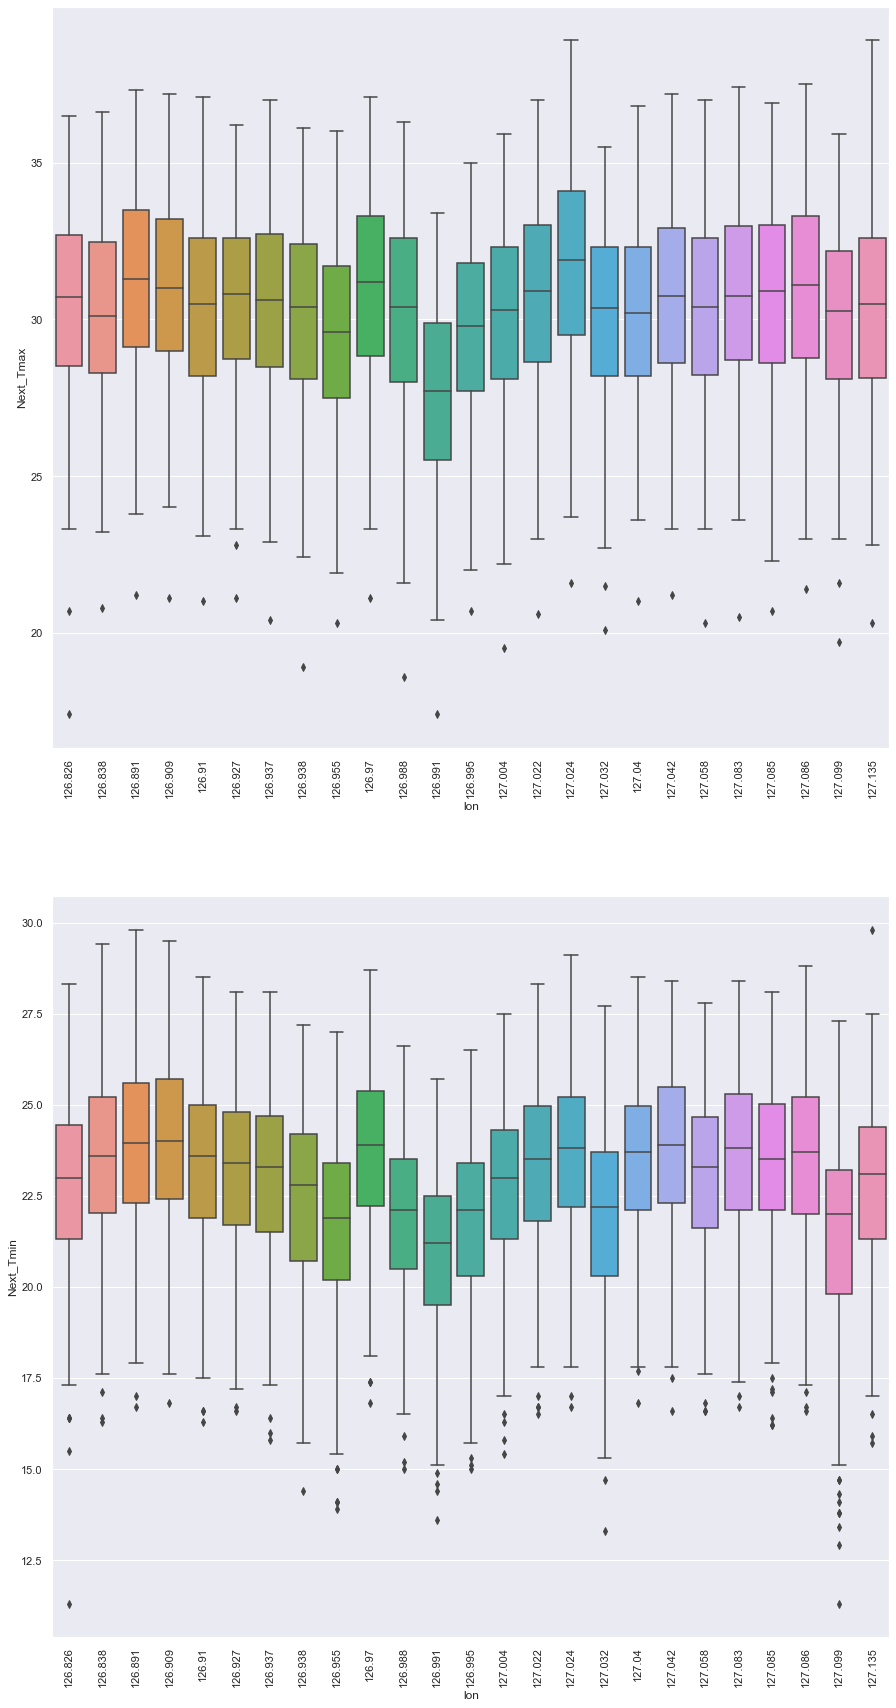

In [29]:
plt.figure(figsize=(15,30))
plt.subplot(2,1,1)
sns.boxplot(x='lon',y='Next_Tmax',data=df)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.boxplot(x='lon',y='Next_Tmin',data=df)
plt.xticks(rotation=90)


studies have shown that longitude does not affect the temperature of a place. While from the above graph it is seen that as the longitude increases, temperature increases for the first 4 longitudes then decreases for the next 5. This increase decrease is carried on.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, '0.0984746'),
  Text(1, 0, '0.0985'),
  Text(2, 0, '0.1332'),
  Text(3, 0, '0.1457'),
  Text(4, 0, '0.1554'),
  Text(5, 0, '0.2223'),
  Text(6, 0, '0.2661'),
  Text(7, 0, '0.2713'),
  Text(8, 0, '0.4125'),
  Text(9, 0, '0.5055'),
  Text(10, 0, '0.5141'),
  Text(11, 0, '0.5721'),
  Text(12, 0, '0.5931'),
  Text(13, 0, '0.618'),
  Text(14, 0, '0.6233'),
  Text(15, 0, '0.697'),
  Text(16, 0, '0.8552'),
  Text(17, 0, '1.2313'),
  Text(18, 0, '1.5629'),
  Text(19, 0, '1.7678'),
  Text(20, 0, '2.2579'),
  Text(21, 0, '2.5348'),
  Text(22, 0, '2.6865'),
  Text(23, 0, '2.785'),
  Text(24, 0, '4.7296'),
  Text(25, 0, '5.1782'),
  Text(26, 0, '5.17823')])

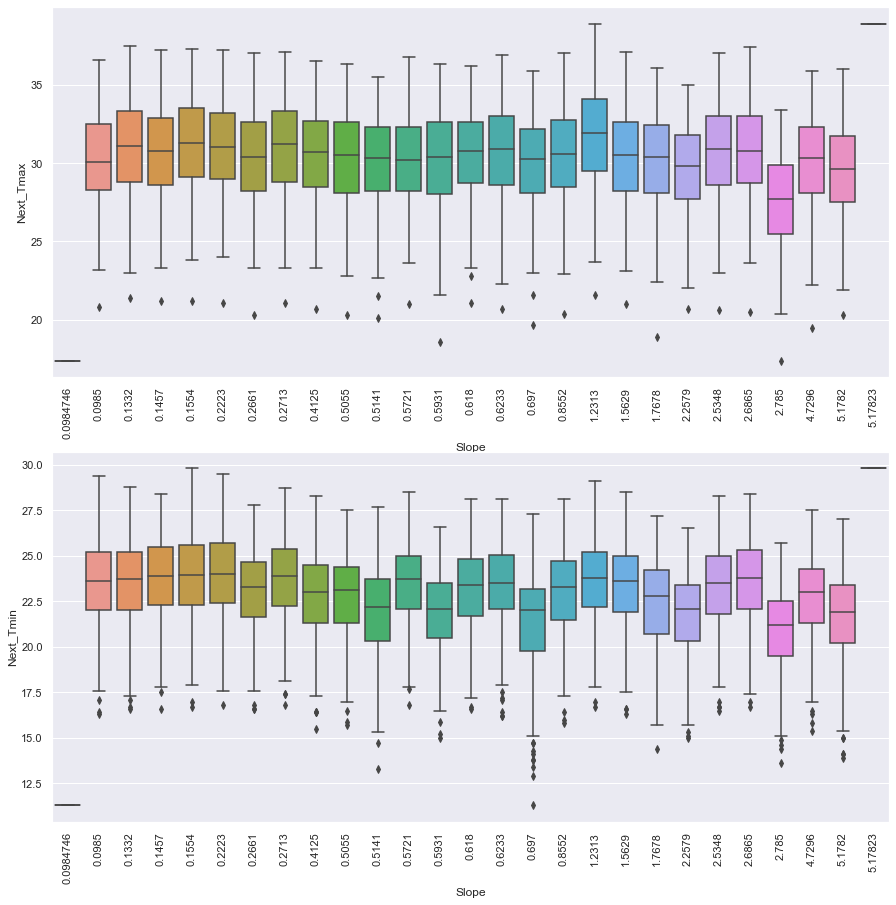

In [30]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.boxplot(x='Slope',y='Next_Tmax',data=df)
plt.xticks(rotation=90)

plt.subplot(2,1,2)
sns.boxplot(x='Slope',y='Next_Tmin',data=df)
plt.xticks(rotation=90)


A steep slope experiences a more rapid change in temperature than a gentle one thats why as rhe slopes increases the range of temperature also increases. Lowest and Highest temperatures are observed at consecutive slopes 0.697 and 0.8552 respectively



<AxesSubplot:title={'center':'Next day min Temperature Vs Present day min Temperature'}, xlabel='Present_Tmin', ylabel='Next_Tmin'>

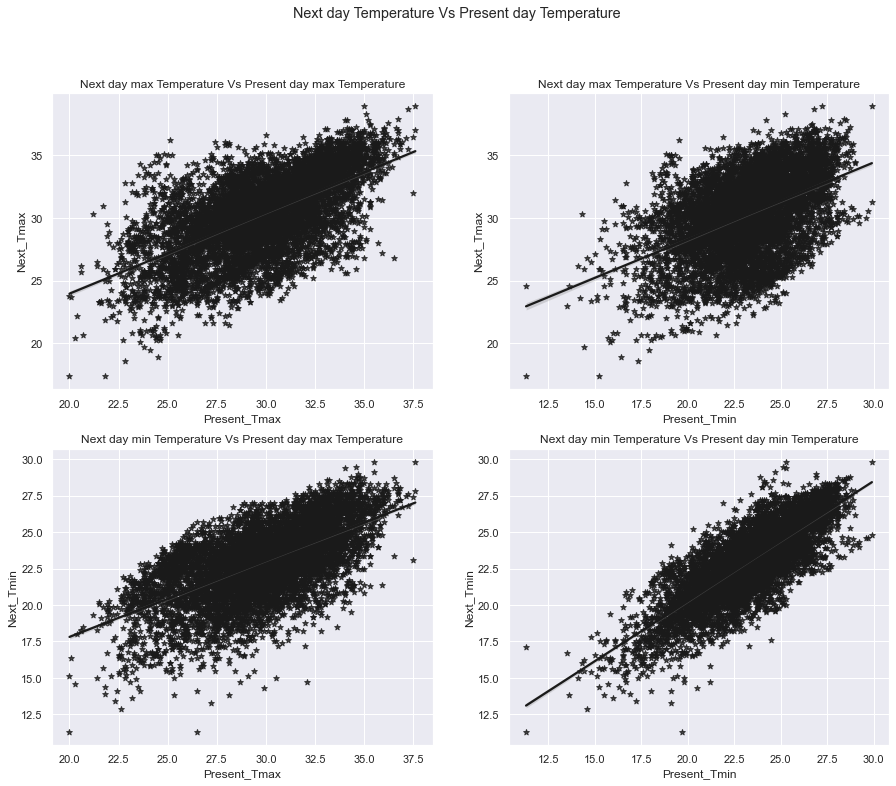

In [31]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Temperature Vs Present day Temperature')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmax' , y= 'Next_Tmax', data=df,marker='*',color='k')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs Present day min Temperature')
sns.regplot(x='Present_Tmin' , y= 'Next_Tmax', data=df,marker='*',color='k')


plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs Present day max Temperature')
sns.regplot(x='Present_Tmax' , y= 'Next_Tmin', data=df,marker='*',color='k')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs Present day min Temperature')
sns.regplot(x='Present_Tmin',  y='Next_Tmin',  data=df,marker='*',color='k')

There is high positive correlation of Next day temperatures with the present day temperatures.



<AxesSubplot:title={'center':'Next day min Temperature Vs Present day min Relative Humidity'}, xlabel='LDAPS_RHmin', ylabel='Next_Tmin'>

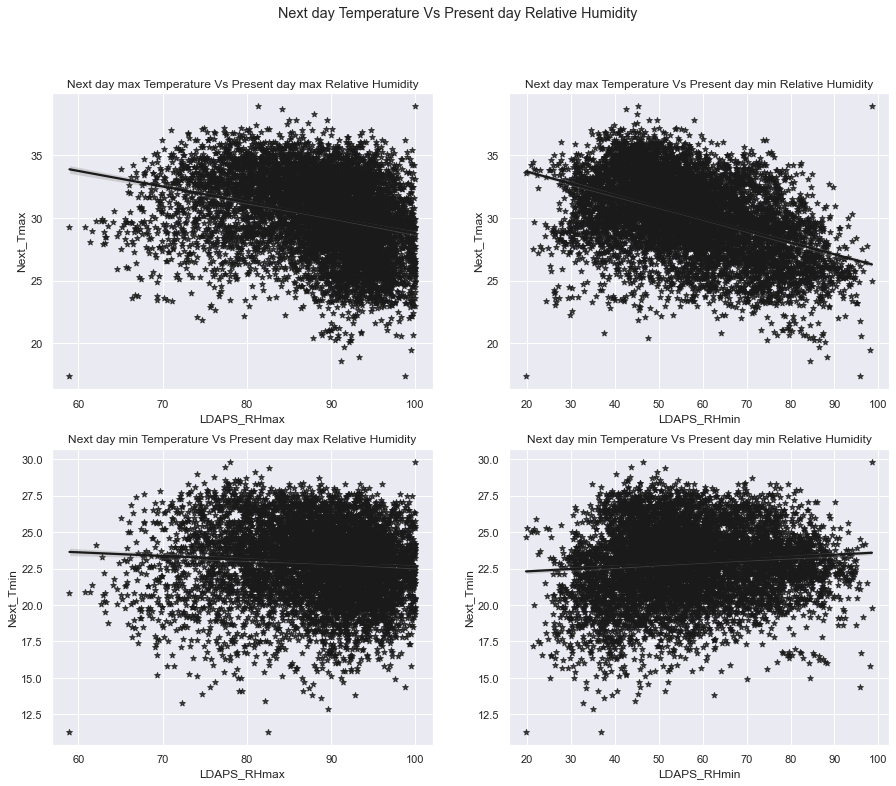

In [32]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Temperature Vs Present day Relative Humidity')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Present day max Relative Humidity')
sns.regplot(x='LDAPS_RHmax' , y= 'Next_Tmax', data=df,marker='*',color='k')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs Present day min Relative Humidity')
sns.regplot(x='LDAPS_RHmin' , y= 'Next_Tmax', data=df,marker='*',color='k')


plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs Present day max Relative Humidity')
sns.regplot(x='LDAPS_RHmax' , y= 'Next_Tmin', data=df,marker='*',color='k')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs Present day min Relative Humidity')
sns.regplot(x='LDAPS_RHmin',  y='Next_Tmin',  data=df,marker='*',color='k')

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmax'>

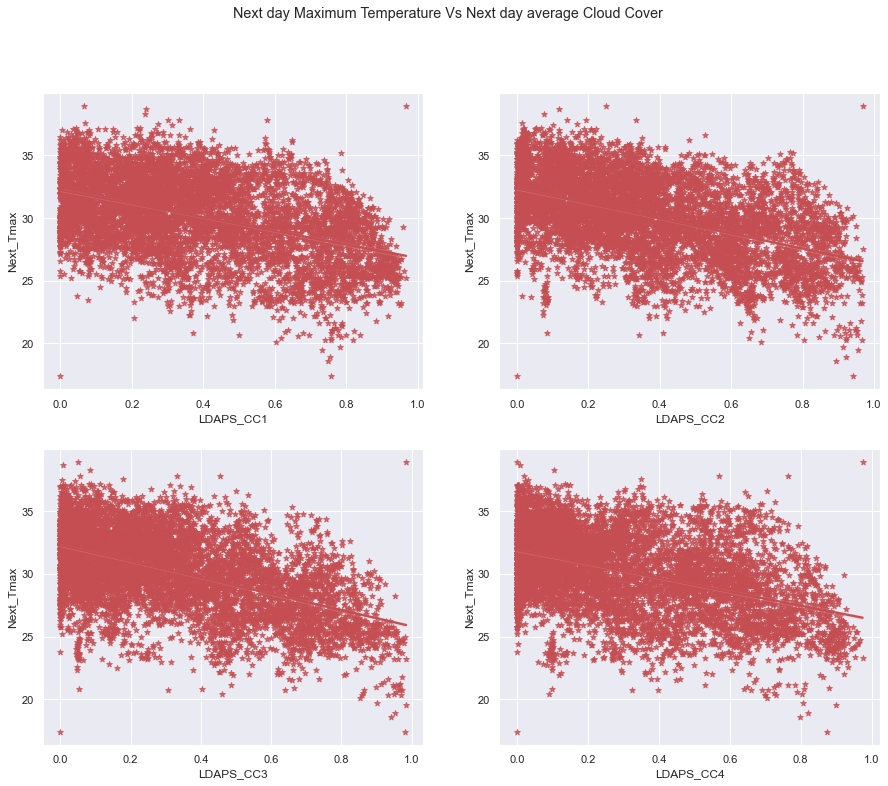

In [33]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Maximum Temperature Vs Next day average Cloud Cover')

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_CC1',y='Next_Tmax',data=df,marker='*',color='r')

plt.subplot(2,2,2)
sns.regplot(x='LDAPS_CC2',y='Next_Tmax',data=df,marker='*',color='r')

plt.subplot(2,2,3)
sns.regplot(x='LDAPS_CC3',y='Next_Tmax',data=df,marker='*',color='r')

plt.subplot(2,2,4)
sns.regplot(x='LDAPS_CC4',y='Next_Tmax',data=df,marker='*',color='r')

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Next_Tmin'>

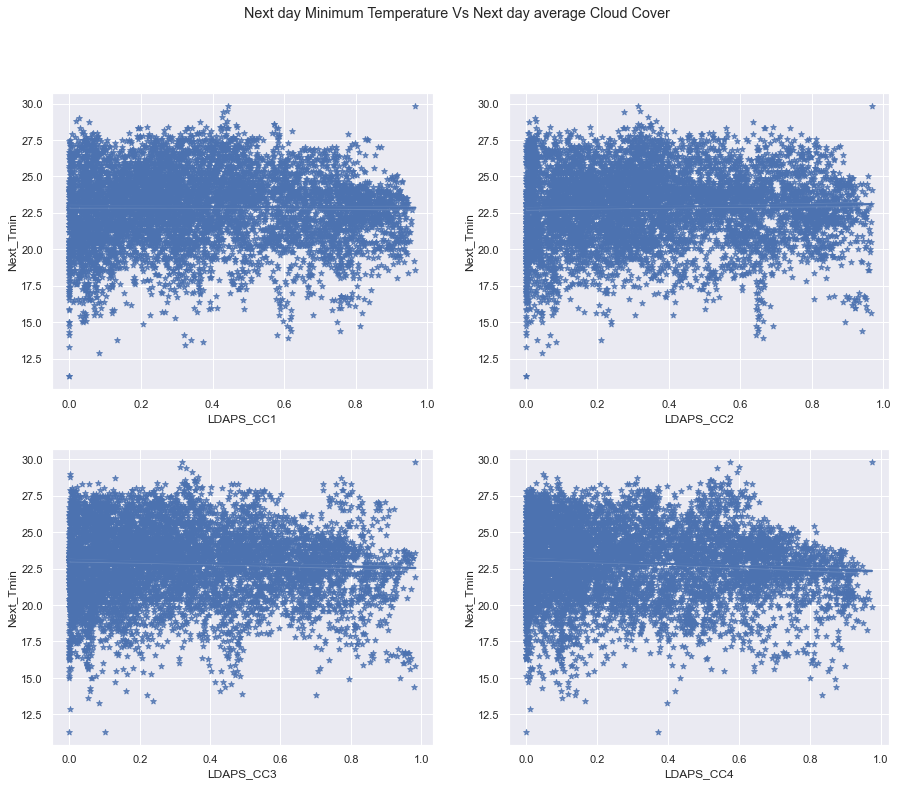

In [34]:
plt.figure(figsize=(15,12))
plt.suptitle('Next day Minimum Temperature Vs Next day average Cloud Cover')

plt.subplot(2,2,1)
sns.regplot(x='LDAPS_CC1',y='Next_Tmin',data=df,marker='*',color='b')

plt.subplot(2,2,2)
sns.regplot(x='LDAPS_CC2',y='Next_Tmin',data=df,marker='*',color='b')

plt.subplot(2,2,3)
sns.regplot(x='LDAPS_CC3',y='Next_Tmin',data=df,marker='*',color='b')

plt.subplot(2,2,4)
sns.regplot(x='LDAPS_CC4',y='Next_Tmin',data=df,marker='*',color='b')

Next day Tmax decreases with increase in RHmax and RHmin while this is not true for Tmin as Tmin seem to be unaffected by Rhmax and shows a slight positive correlation with Rhmin.



# Multivariate Analysis


<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

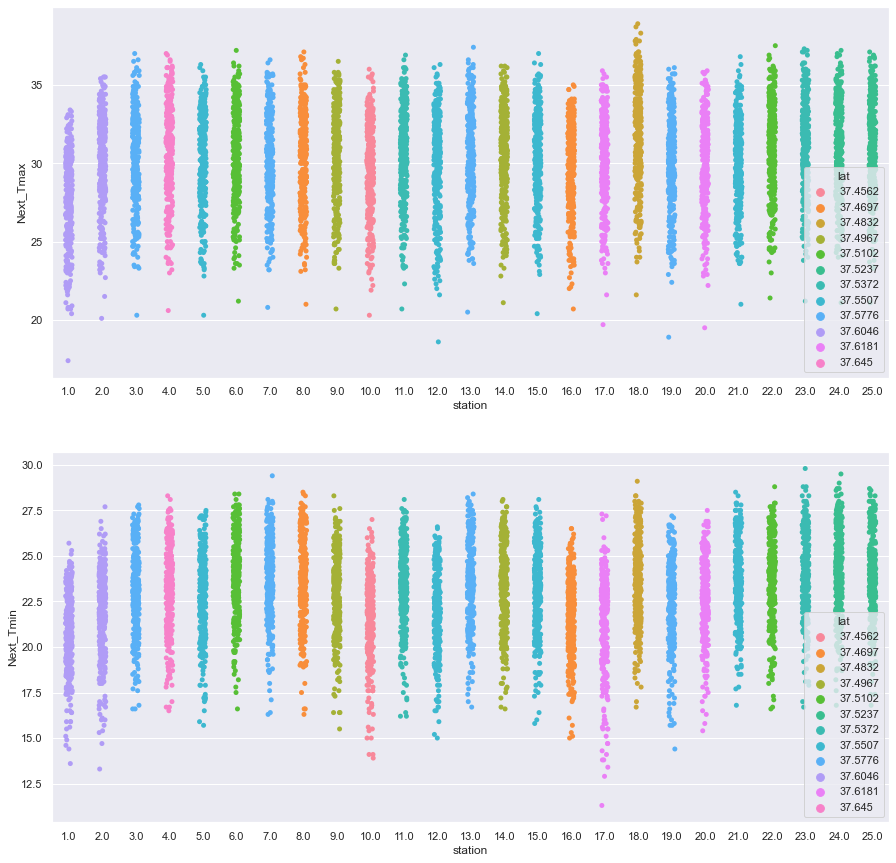

In [35]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.stripplot(x='station',y='Next_Tmax',hue='lat',data=df)

plt.subplot(2,1,2)
sns.stripplot(x='station',y='Next_Tmin',hue='lat',data=df)

ach station is located on a particular lalitude, There are atmost 3 staions on a single latitude, and as the latitude decreases, temperature seem to increase.

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

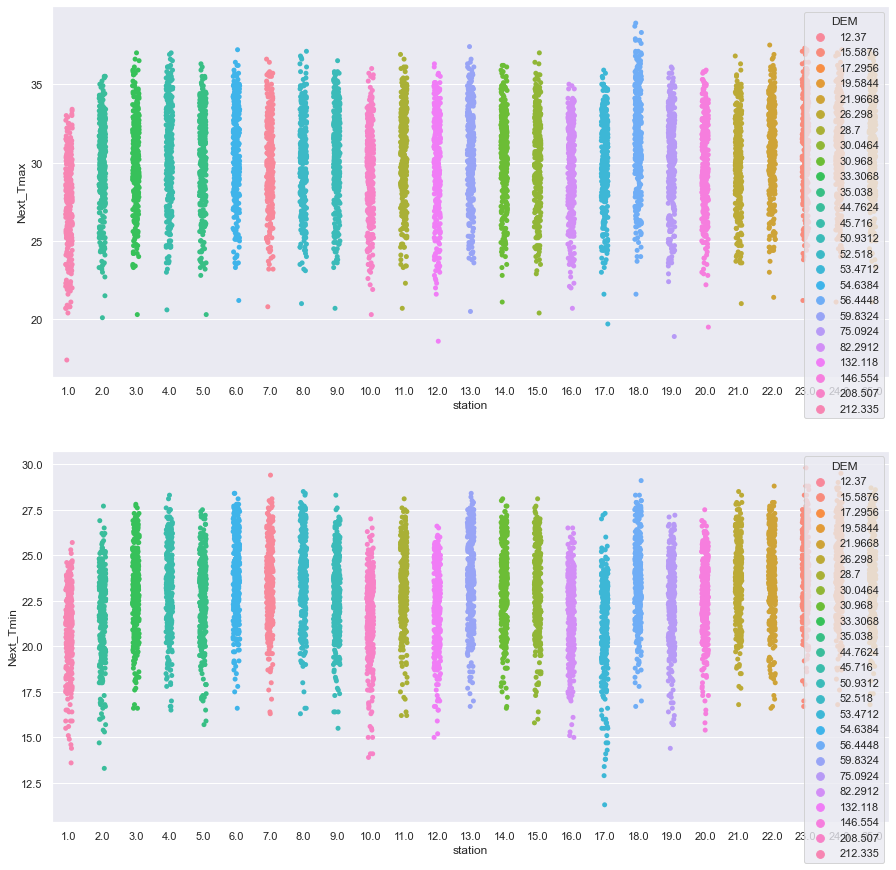

In [36]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.stripplot(x='station',y='Next_Tmax',hue='DEM',data=df)

plt.subplot(2,1,2)
sns.stripplot(x='station',y='Next_Tmin',hue='DEM',data=df)

Each station belong to a particular elevation. There is only one statiton belonging to a particular elevation. Highest tmax is noted at station 18 which have an elevation 56.44 even though it is not the lowest elevation, which indicates that elevation alone does not decide the temperature.



<AxesSubplot:>

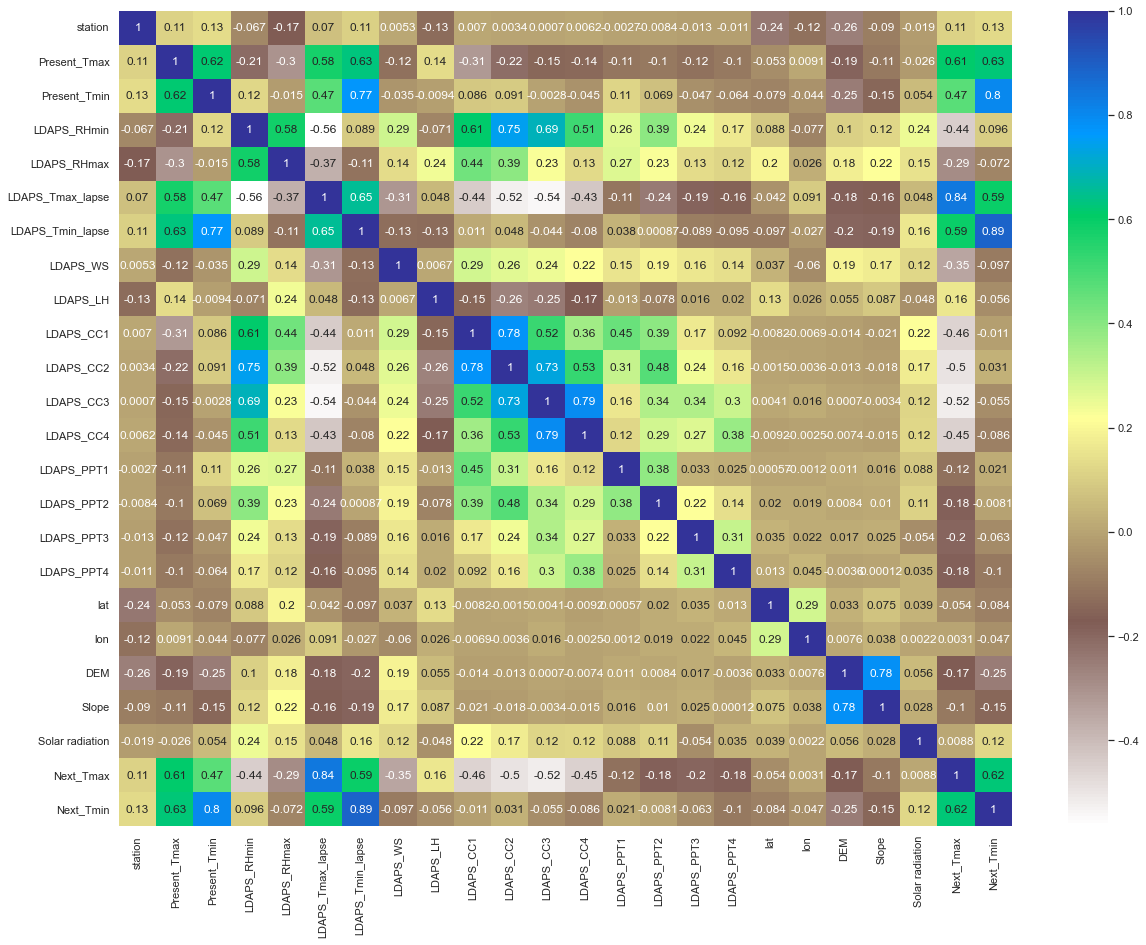

In [37]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True ,cmap='terrain_r')

There is high correlation of Next day Tmax and Tmin with Present day Tmax and Tmin, Tmax applied lapse rate and Tmin applied lapse rate. There is also a high negative correlation of Tmax with cloud cover splits and relative minimum humidity. There is also high correlation between many independent features such as Present Day Tmax and Tmin, elevation ans slope etc. Multicollinearity need to be eliminated.



# Pre-Processing Pipeline


dropping data column

In [38]:
df.drop('Date', axis=1, inplace=True)

Rounding off the value of slope

In [39]:
df['Slope'].unique()

array([2.785    , 0.5141   , 0.2661   , 2.5348   , 0.5055   , 0.1457   ,
       0.0985   , 1.5629   , 0.4125   , 5.1782   , 0.6233   , 0.5931   ,
       2.6865   , 0.618    , 0.8552   , 2.2579   , 0.697    , 1.2313   ,
       1.7678   , 4.7296   , 0.5721   , 0.1332   , 0.1554   , 0.2223   ,
       0.2713   , 0.0984746, 5.17823  ])

In [40]:
df['Slope'].replace({0.0984746:0.0985,5.17823:5.1782},inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '0.0985'),
  Text(1, 0, '0.1332'),
  Text(2, 0, '0.1457'),
  Text(3, 0, '0.1554'),
  Text(4, 0, '0.2223'),
  Text(5, 0, '0.2661'),
  Text(6, 0, '0.2713'),
  Text(7, 0, '0.4125'),
  Text(8, 0, '0.5055'),
  Text(9, 0, '0.5141'),
  Text(10, 0, '0.5721'),
  Text(11, 0, '0.5931'),
  Text(12, 0, '0.618'),
  Text(13, 0, '0.6233'),
  Text(14, 0, '0.697'),
  Text(15, 0, '0.8552'),
  Text(16, 0, '1.2313'),
  Text(17, 0, '1.5629'),
  Text(18, 0, '1.7678'),
  Text(19, 0, '2.2579'),
  Text(20, 0, '2.5348'),
  Text(21, 0, '2.6865'),
  Text(22, 0, '2.785'),
  Text(23, 0, '4.7296'),
  Text(24, 0, '5.1782')])

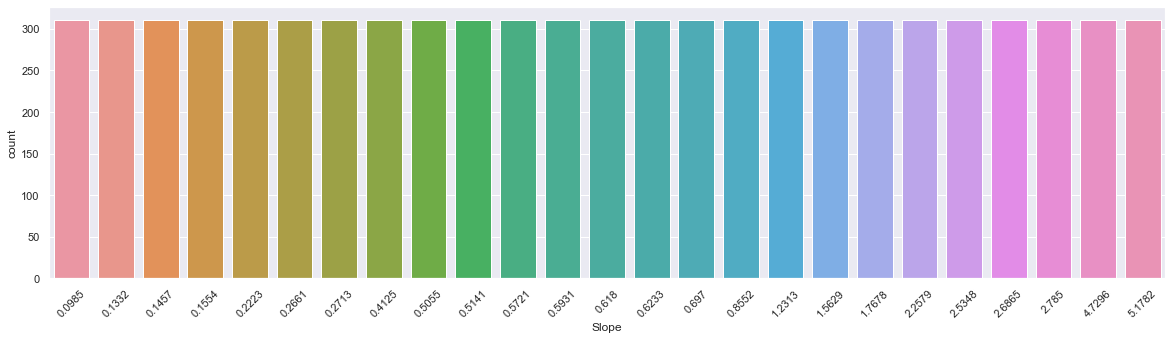

In [41]:
plt.figure(figsize=(20,5))
sns.countplot(df['Slope'])
plt.xticks(rotation=45)

now there is no ambigious values

In [42]:
from scipy.stats import mode

Next Tmax And Tmin Columns

In [43]:
df=df[df['Next_Tmax'].notnull()]

station column

In [44]:
table=pd.pivot_table(values='station',index='Slope',data=df)
table.head()

,station
Slope,
0.0985,7.0
0.1332,22.0
0.1457,6.0
0.1554,23.0
0.2223,24.0


FIlling nan values of station from slope column as slope serves as an identifier column to station.



In [45]:
def sta(x):
    return table.loc[x['Slope'],'station']

df['station'].fillna(df[df['station'].isnull()].apply(sta,axis=1),inplace=True)

Deleting rows which have atleast 14 null values


In [46]:
df.dropna(subset=df.columns,thresh=14,inplace=True)

# present Tmax and Tmin

In [47]:
#We are dropping these null values as weel because upon evalution this gives better result than imputing these with mean values
df.dropna(inplace=True)

<AxesSubplot:>

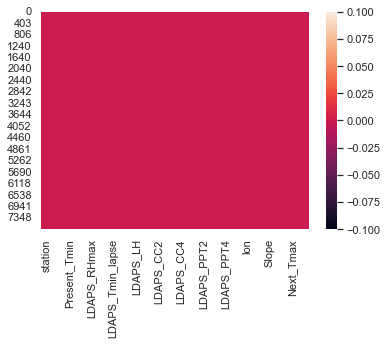

In [48]:
sns.heatmap(df.isnull())

  no null values remain

# removing outliers

In [49]:
from scipy.stats import zscore

In [50]:
def threhold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('with threhold{}dat loss is {}%'.format(np.round(i,1),np.round(loss,2)))

In [51]:
z=np.abs(zscore(df))
threhold(z,df)

with threhold3.0dat loss is 11.09%
with threhold3.2dat loss is 9.51%
with threhold3.4dat loss is 8.38%
with threhold3.6dat loss is 7.56%
with threhold3.8dat loss is 6.89%
with threhold4.0dat loss is 6.25%
with threhold4.2dat loss is 5.8%
with threhold4.4dat loss is 5.19%
with threhold4.6dat loss is 4.74%
with threhold4.8dat loss is 4.37%


In [52]:
#We use threshold as 4.2 because data is expensive and upon evaluation of models this threhold turned out to be the best.
df=df[(z<4.2).all(axis=1)]

In [53]:
#Separating dependent and independent features.
x=df.copy()
x.drop(['Next_Tmax','Next_Tmin'],axis=1,inplace=True)
ymax=df['Next_Tmax']
ymin=df['Next_Tmin']


scalling the dataset

In [54]:
#Scaling the data using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [55]:
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

# MODELIING PHASE

In [56]:
from sklearn.model_selection import train_test_split,cross_val_score

In [57]:
#Importing models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [58]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [59]:
#Choosing the best random state using Logistic regression
def randomstate(a,b):
    maxx=10000000000000
    for state in range (1,201):
        xtrain,xtest,ytrain,ytest=train_test_split(a,b,test_size=0.25,random_state=state)
        model=LinearRegression()
        model.fit(xtrain,ytrain)
        p=model.predict(xtest)
        mse=mean_squared_error(p,ytest)
        if maxx>mse:
            maxx=mse
            j=state
    return j

In [60]:
models=[KNeighborsRegressor(),SVR(),LinearRegression(),Lasso(),Ridge(),DecisionTreeRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]
names=['KNeighborsRegressor','SVR','LinearRegression','Lasso','Ridge','DecisionTreeRegressor','RandomForestRegressor','AdaBoostRegressor','GradientBoostingRegressor']
       

# Reducing Multicollinearity using Lasso

# for Tmax

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(x,ymax)
print(m1.best_params_)

{'alpha': 0.001}


In [63]:
m1=Lasso(alpha=0.001)
m1.fit(x,ymax)

Lasso(alpha=0.001)

In [64]:
importance=np.abs(m1.coef_)

In [65]:
dfcolumns=pd.DataFrame(x.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns=['Features','Coefficients']
featureScores

,Features,Coefficients
0,station,0.411553
1,Present_Tmax,2.672174
2,Present_Tmin,0.356956
3,LDAPS_RHmin,1.441764
4,LDAPS_RHmax,0.000000
5,LDAPS_Tmax_lapse,11.582212
6,LDAPS_Tmin_lapse,1.912829
7,LDAPS_WS,1.988651
8,LDAPS_LH,1.601504
9,LDAPS_CC1,0.964231


# for Tmin

In [66]:
param_grid={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,1000]}
m1=GridSearchCV(Lasso(),param_grid,scoring='neg_mean_squared_error',cv=10)
m1.fit(x,ymin)
print(m1.best_params_)

{'alpha': 0.001}


In [67]:
m1=Lasso(alpha=0.001)
m1.fit(x,ymin)

Lasso(alpha=0.001)

In [68]:
importance=np.abs(m1.coef_)

In [69]:
dfcolumns=pd.DataFrame(x.columns)
dfimp=pd.DataFrame(importance)
featureScores = pd.concat([dfcolumns,dfimp],axis=1)
featureScores.columns=['Features','Coefficients']
featureScores

,Features,Coefficients
0,station,0.000000
1,Present_Tmax,0.568483
2,Present_Tmin,3.676911
3,LDAPS_RHmin,1.319730
4,LDAPS_RHmax,0.166486
5,LDAPS_Tmax_lapse,1.511317
6,LDAPS_Tmin_lapse,9.966543
7,LDAPS_WS,0.487276
8,LDAPS_LH,0.295016
9,LDAPS_CC1,0.266698


# Hyperparameter Tuning

# for the next day  maximum temprature

In [70]:
xtrain_max,xtest_max,ytrain_max,ytest_max=train_test_split(x,ymax,test_size=0.25,random_state=randomstate(x,ymax))


Ridge Regresosor

In [71]:
params={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,0.1,1,5,10,15,20,30,35,45,50,55,65,100,110,150,200, 230, 250,265, 270, 275, 290, 300, 500,1000]}

In [72]:
g=GridSearchCV(Ridge(),params,cv=10)

In [73]:
g.fit(xtrain_max,ytrain_max)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.1, 1, 5,
                                   10, 15, 20, 30, 35, 45, 50, 55, 65, 100, 110,
                                   150, 200, 230, 250, 265, 270, 275, 290, 300,
                                   500, 1000]})

In [74]:
print(g.best_estimator_)
print(g.best_params_)
print(g.best_score_)

Ridge(alpha=0.1)
{'alpha': 0.1}
0.7672978511258245


In [75]:
m=Ridge(alpha=0.1)
m.fit(xtrain_max,ytrain_max)
p=m.predict(xtest_max)

In [76]:
score=cross_val_score(m,x,ymax,cv=10)

In [77]:
print('Mean Absolute Error is ',np.round(mean_absolute_error(p,ytest_max),4))
print('Mean squared Error is ',np.round(mean_squared_error(p,ytest_max),4))
print('Root Mean Squared Error is',np.round(np.sqrt(mean_squared_error(p,ytest_max)),4))
print('R2 Score is ',np.round(r2_score(p,ytest_max),4)*100)
print('Mean of cross validaton Score is',np.round(np.mean(score)*100,4))


Mean Absolute Error is  1.0502
Mean squared Error is  1.9182
Root Mean Squared Error is 1.385
R2 Score is  72.53
Mean of cross validaton Score is 67.4787
